In [99]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

# Research 

Potential Questions: 
- What are the most frequently rated restaurants?
- What is the frequency of inspection of these restaurants?
- What is the most common violation for restaurants in NYC?
- What are the remediations/actions taken for certain inspection scores?
- What borough has the highest scored inspection ratings on average?
- Are certain violations more common in certain boroughs? By cuisine?
- Are chain or independent restaurants higher rated on average?


# `Explore the Data`

In [100]:
isp = pd.read_csv('../DOHMH_New_York_City_Restaurant_Inspection_Results.csv')

isp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208459 entries, 0 to 208458
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  208459 non-null  int64  
 1   DBA                    207872 non-null  object 
 2   BORO                   208459 non-null  object 
 3   BUILDING               208130 non-null  object 
 4   STREET                 208452 non-null  object 
 5   ZIPCODE                205775 non-null  float64
 6   PHONE                  208451 non-null  object 
 7   CUISINE DESCRIPTION    206045 non-null  object 
 8   INSPECTION DATE        208459 non-null  object 
 9   ACTION                 206045 non-null  object 
 10  VIOLATION CODE         204901 non-null  object 
 11  VIOLATION DESCRIPTION  204901 non-null  object 
 12  CRITICAL FLAG          208459 non-null  object 
 13  SCORE                  198589 non-null  float64
 14  GRADE                  102128 non-nu

In [101]:
print(isp.shape)

(208459, 27)


In [102]:
isp

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
0,41503108,TULCINGO RESTAURANT,Queens,40364040,NATIONAL STREET,NaN,7186398880,Mexican,09/26/2023,Violations were cited in the following area(s).,02B,Hot TCS food item not held at or above 140 °F.,Critical,26.0,NaN,NaN,11/12/2023,Cycle Inspection / Initial Inspection,0.000000,0.000000,NaN,NaN,NaN,NaN,4.000000e+00,NaN,NaN
1,50135598,United Chinese Association of Brooklyn,Brooklyn,1787,STILLWELL AVENUE,11223.0,7182320055,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,11/12/2023,NaN,40.602887,-73.986424,311.0,43.0,40400.0,3176369.0,3.066430e+09,BK29,NaN
2,50139946,CHEZ OMAR,Manhattan,394,WEST STREET,10014.0,9175606080,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,11/12/2023,NaN,40.733028,-74.010284,102.0,3.0,7500.0,1011975.0,1.006360e+09,MN23,NaN
3,50126672,NaN,0,2,SHADY BROOK LN,8512.0,6097997555,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,11/12/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50107357,NaN,Queens,29-21,ASTORIA BOULEVARD,11102.0,3478080747,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,11/12/2023,NaN,40.770403,-73.919343,401.0,22.0,6900.0,4017400.0,4.008380e+09,QN71,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208454,50117893,WE JUICING,Queens,16546,BAISLEY BLVD,11434.0,9177709055,"Juice, Smoothies, Fruit Salads",03/14/2023,Violations were cited in the following area(s).,10F,Non-food contact surface or equipment made of ...,Not Critical,2.0,NaN,NaN,11/12/2023,Pre-permit (Operational) / Compliance Inspection,40.679181,-73.778175,412.0,28.0,33402.0,4436354.0,4.124950e+09,QN02,NaN
208455,41429791,RASPBERRY DELI & GROCERY,Manhattan,2127,2 AVENUE,10029.0,2128602615,Sandwiches,03/01/2022,Violations were cited in the following area(s).,02G,Cold food item held above 41º F (smoked fish a...,Critical,12.0,A,03/01/2022,11/12/2023,Cycle Inspection / Initial Inspection,40.792846,-73.940822,111.0,8.0,18000.0,1052439.0,1.016590e+09,MN34,NaN
208456,50002491,AGORA TURKISH RESTAURANT,Manhattan,1565,SECOND AVENUE,10028.0,2127171220,Turkish,03/22/2022,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or ...,Not Critical,0.0,NaN,NaN,11/12/2023,Cycle Inspection / Initial Inspection,40.774846,-73.953959,108.0,5.0,13800.0,1048567.0,1.015270e+09,MN32,NaN
208457,50115895,PAPA'S PIZZA,Brooklyn,187,BEDFORD AVENUE,11211.0,7187243651,Pizza,10/18/2023,Violations were cited in the following area(s).,08A,Establishment is not free of harborage or cond...,Not Critical,39.0,Z,10/18/2023,11/12/2023,Cycle Inspection / Re-inspection,40.717675,-73.957876,301.0,34.0,55300.0,3062093.0,3.023280e+09,BK73,NaN


In [103]:
isp.dtypes

CAMIS                      int64
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                  float64
PHONE                     object
CUISINE DESCRIPTION       object
INSPECTION DATE           object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
GRADE DATE                object
RECORD DATE               object
INSPECTION TYPE           object
Latitude                 float64
Longitude                float64
Community Board          float64
Council District         float64
Census Tract             float64
BIN                      float64
BBL                      float64
NTA                       object
Location Point1          float64
dtype: object

In [104]:
# descritive stats for numerical features
isp.describe()

,CAMIS,ZIPCODE,SCORE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,Location Point1
count,2.084590e+05,205775.000000,198589.000000,208198.000000,208198.000000,205231.000000,205227.000000,205227.000000,2.042520e+05,2.079080e+05,0.0
mean,4.755613e+07,10707.892723,22.791841,40.202806,-72.990595,254.572219,20.843383,30087.219688,2.576378e+06,2.465193e+09,NaN
std,4.027041e+06,594.464550,17.533970,4.588820,8.330709,130.044844,15.835136,31612.998534,1.346160e+06,1.336778e+09,NaN
min,3.007544e+07,8512.000000,0.000000,0.000000,-74.249101,101.000000,1.000000,100.000000,1.000000e+06,1.000000e+00,NaN
25%,4.164907e+07,10023.000000,11.000000,40.682779,-73.988915,106.000000,4.000000,8000.000000,1.051209e+06,1.010898e+09,NaN
50%,5.006713e+07,11101.000000,19.000000,40.730046,-73.956446,302.000000,20.000000,17402.000000,3.022022e+06,3.008010e+09,NaN
75%,5.010698e+07,11231.000000,30.000000,40.760941,-73.896137,401.000000,34.000000,42600.000000,4.006920e+06,4.004721e+09,NaN
max,5.014427e+07,12345.000000,168.000000,40.912822,0.000000,595.000000,51.000000,162100.000000,5.799501e+06,5.270001e+09,NaN


`NOTE`: Establishments with inspection date of 1/1/1900 are new establishments that have not yet received an inspection.

Q: *Why is this significant?*

`we want to predict the score, so exclude the restaurants that don't have an inspection yet`

<Axes: title={'center': 'Score Distribution'}, xlabel='SCORE'>

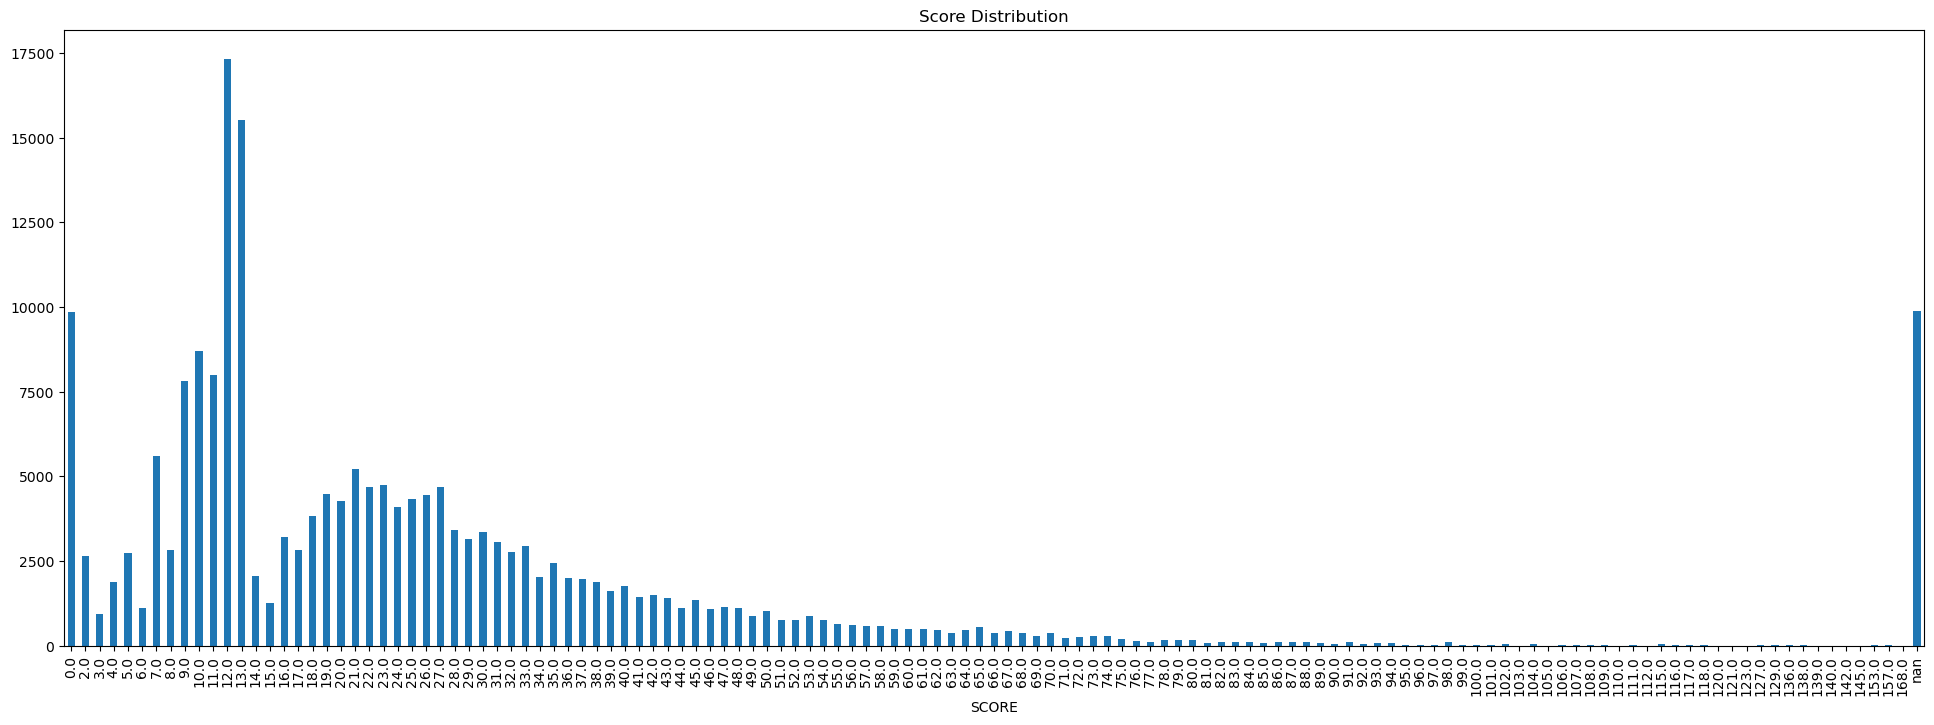

In [105]:
isp['SCORE'].value_counts(dropna=False).sort_index().plot.bar(figsize=(24,8),x='Score',y='Frequency',title='Score Distribution')

<Axes: title={'center': 'Rest Grades'}, xlabel='GRADE'>

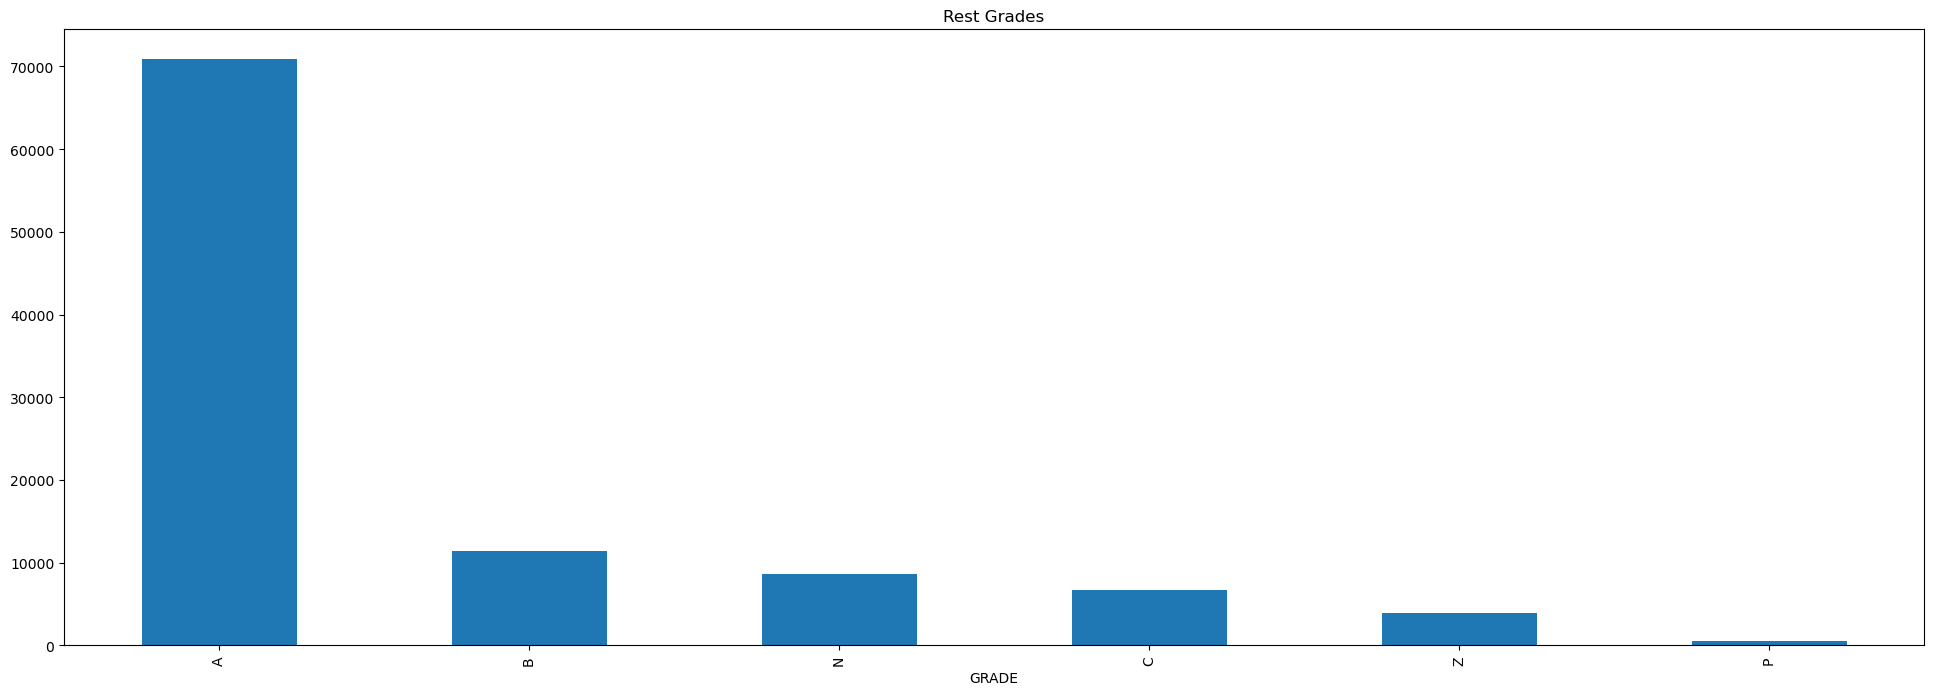

In [106]:
isp['GRADE'].value_counts(dropna=True).plot.bar(figsize=(24,8),x='Grade',y='Frequency',title='Rest Grades')

## `Notes on Scores & Grades Columns`:

Scores:
- 0-13 = A
- 14-27 = B
- 28+ = C

Grades
* N= Not Yet Graded
* A = Grade A
* B = Grade B
* C = Grade C
* Z = Grade Pending
* P=Grade Pending issued on re-opening following an initial inspection that resulted in a closure

Insights:
- Many restaurants have scores of 12 and 13 -- just below the threshold to still have an "A" score


_______
NOTE: MUST USE SCORE `or` Grade as Y varibale and exclude the other because grade is derived form the score, so including it is cheating

In [107]:
# Renaming Columns to be more pandas-friendly.
isp.columns = [c.strip().replace(' ', '_').lower() for c in isp.columns]

In [108]:
isp.head()

,camis,dba,boro,building,street,zipcode,phone,cuisine_description,inspection_date,action,violation_code,violation_description,critical_flag,score,grade,grade_date,record_date,inspection_type,latitude,longitude,community_board,council_district,census_tract,bin,bbl,nta,location_point1
0,41503108,TULCINGO RESTAURANT,Queens,40364040,NATIONAL STREET,NaN,7186398880,Mexican,09/26/2023,Violations were cited in the following area(s).,02B,Hot TCS food item not held at or above 140 °F.,Critical,26.0,NaN,NaN,11/12/2023,Cycle Inspection / Initial Inspection,0.000000,0.000000,NaN,NaN,NaN,NaN,4.000000e+00,NaN,NaN
1,50135598,United Chinese Association of Brooklyn,Brooklyn,1787,STILLWELL AVENUE,11223.0,7182320055,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,11/12/2023,NaN,40.602887,-73.986424,311.0,43.0,40400.0,3176369.0,3.066430e+09,BK29,NaN
2,50139946,CHEZ OMAR,Manhattan,394,WEST STREET,10014.0,9175606080,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,11/12/2023,NaN,40.733028,-74.010284,102.0,3.0,7500.0,1011975.0,1.006360e+09,MN23,NaN
3,50126672,NaN,0,2,SHADY BROOK LN,8512.0,6097997555,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,11/12/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50107357,NaN,Queens,29-21,ASTORIA BOULEVARD,11102.0,3478080747,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,11/12/2023,NaN,40.770403,-73.919343,401.0,22.0,6900.0,4017400.0,4.008380e+09,QN71,NaN


# show value Counts, Length, and Dtype for each Column:


In [109]:
for col in isp.columns:
    print(f'Column name: {col}')
    print(isp[col].value_counts(dropna=False))
    print("-"*50)
    print("\n")

Column name: camis
camis
40398688    65
41406895    59
50045647    56
40365904    52
50111296    49
            ..
50143196     1
50109098     1
50142808     1
50141673     1
50108967     1
Name: count, Length: 28320, dtype: int64
--------------------------------------------------


Column name: dba
dba
DUNKIN                        2573
SUBWAY                        1510
STARBUCKS                     1172
MCDONALD'S                    1058
KENNEDY FRIED CHICKEN          707
                              ... 
GULAABO                          1
CAFE 58 PIZZERIA AND GRILL       1
THE GLASSHOUSE ROOFTOP           1
SHOO LOONG KAN                   1
264 suydam LLC                   1
Name: count, Length: 22111, dtype: int64
--------------------------------------------------


Column name: boro
boro
Manhattan        77264
Brooklyn         55682
Queens           49870
Bronx            18468
Staten Island     7163
0                   12
Name: count, dtype: int64
-----------------------------

# Assumptions Thus Far

`target` 
- score (regression)

`features` to use
- keep camis and inspection date to identify each unique inspection
- inspection_type
- latitude, longitude
- critical flag
- violation_code (n=144, convert to category)
- action (n=6, yes violations cited, no violations, rest. closed, rest. re-closed, rest. opened/re-opened, N/A)
- cuisine_description (n=90)
- zipcode
- boro
    - watch for multicolinearity with council_district, latitude/longitude, community_board, zipcode

good but redundant location data
- latitude, longitude
- community_board (convert to category)
- council_district (convert to category, n=~50)



## Initial Exploration Questions 

* Drop the Location_point1 column, all NaN 
* Potentially drop record pull date (same value for entire data set.)
* Why are there 112954 NaN for Grade Date?
* Why do Zip Codes have a float on them?
* What is Borough 0? 
* 2414 Restaurants not yet inspected (INT 64 ) - can change to 00/00/0000
* Columns Bbl, Nta, Bin, and Census_tract require further investigation (unsure of what they represent)


# Restaurant Names

In [110]:
isp.columns

Index(['camis', 'dba', 'boro', 'building', 'street', 'zipcode', 'phone',
       'cuisine_description', 'inspection_date', 'action', 'violation_code',
       'violation_description', 'critical_flag', 'score', 'grade',
       'grade_date', 'record_date', 'inspection_type', 'latitude', 'longitude',
       'community_board', 'council_district', 'census_tract', 'bin', 'bbl',
       'nta', 'location_point1'],
      dtype='object')

In [111]:
isp['dba'].describe()

count     207872
unique     22110
top       DUNKIN
freq        2573
Name: dba, dtype: object

In [112]:
# check NaN restaurant names
isp['dba'].isna().sum()

587

In [113]:
# See what other columns have a NaN if restaurant name is a NaN
# Use a boolean mask where True represents NaN values and apply to DF to get subset of rows which have NaN values
isp[isp['dba'].isna()]

,camis,dba,boro,building,street,zipcode,phone,cuisine_description,inspection_date,action,violation_code,violation_description,critical_flag,score,grade,grade_date,record_date,inspection_type,latitude,longitude,community_board,council_district,census_tract,bin,bbl,nta,location_point1
3,50126672,NaN,0,2,SHADY BROOK LN,8512.0,6097997555,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,11/12/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50107357,NaN,Queens,29-21,ASTORIA BOULEVARD,11102.0,3478080747,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,11/12/2023,NaN,40.770403,-73.919343,401.0,22.0,6900.0,4017400.0,4.008380e+09,QN71,NaN
5,50140007,NaN,Manhattan,1154,1 AVENUE,10065.0,9176925975,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,11/12/2023,NaN,40.762302,-73.959985,108.0,5.0,10602.0,1072681.0,1.014588e+09,MN31,NaN
6,50131153,NaN,Queens,13621,ROOSEVELT AVE,11354.0,9299908888,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,11/12/2023,NaN,40.759792,-73.829243,407.0,20.0,87100.0,4112492.0,4.049800e+09,QN22,NaN
10,50143471,NaN,Bronx,812,RIVER AVE,10451.0,6508042797,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,11/12/2023,NaN,40.826132,-73.926895,204.0,16.0,6300.0,NaN,2.000000e+00,BX63,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205697,50132784,NaN,Bronx,283,SAINT ANNS AVENUE,10454.0,9176881611,Spanish,08/10/2023,Violations were cited in the following area(s).,10F,Non-food contact surface or equipment made of ...,Not Critical,27.0,N,NaN,11/12/2023,Pre-permit (Operational) / Initial Inspection,40.807919,-73.916743,201.0,8.0,3900.0,2000082.0,2.022670e+09,BX39,NaN
206395,50129735,NaN,Manhattan,1802,65TH STREET TRANSVERVSE,NaN,9172151616,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,11/12/2023,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN
206422,50125471,NaN,Brooklyn,228,DUFFIELD STREET,11201.0,9175159593,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,11/12/2023,NaN,40.691298,-73.984393,302.0,33.0,1500.0,3424452.0,3.001450e+09,BK38,NaN
206915,50144191,NaN,Staten Island,2636,HYLAN BOULEVARD,10306.0,3477015000,NaN,01/01/1900,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,11/12/2023,NaN,40.567454,-74.112765,502.0,50.0,12804.0,5000000.0,5.039690e+09,SI45,NaN


* Appears some of these Inspections were pre-permit (Operational) which may explain the lack of name. Many others we may need to exclude for additional analysis

____
# `Data Cleaning`

In [114]:
# Keep only the feature columns for ML algorithms to use

df = isp[[ "score",
            "camis",
            "inspection_date",
            "inspection_type",
            "latitude",
            "longitude",
            "critical_flag",
            "violation_code",
            "action",
            "cuisine_description",
            "zipcode",
            "boro"]]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208459 entries, 0 to 208458
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   score                198589 non-null  float64
 1   camis                208459 non-null  int64  
 2   inspection_date      208459 non-null  object 
 3   inspection_type      206045 non-null  object 
 4   latitude             208198 non-null  float64
 5   longitude            208198 non-null  float64
 6   critical_flag        208459 non-null  object 
 7   violation_code       204901 non-null  object 
 8   action               206045 non-null  object 
 9   cuisine_description  206045 non-null  object 
 10  zipcode              205775 non-null  float64
 11  boro                 208459 non-null  object 
dtypes: float64(4), int64(1), object(7)
memory usage: 19.1+ MB


In [115]:
# drop blank scores
df = df.dropna(subset='score') 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198589 entries, 0 to 208458
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   score                198589 non-null  float64
 1   camis                198589 non-null  int64  
 2   inspection_date      198589 non-null  object 
 3   inspection_type      198589 non-null  object 
 4   latitude             198366 non-null  float64
 5   longitude            198366 non-null  float64
 6   critical_flag        198589 non-null  object 
 7   violation_code       197948 non-null  object 
 8   action               198589 non-null  object 
 9   cuisine_description  198589 non-null  object 
 10  zipcode              196040 non-null  float64
 11  boro                 198589 non-null  object 
dtypes: float64(4), int64(1), object(7)
memory usage: 19.7+ MB


In [116]:
# investigate remaining na rows
df['na_count'] = df.isna().sum(axis=1)

# Sort the DataFrame by the 'na_count' column in descending order
na_subset = df[df['na_count'] > 0].sort_values(by='na_count', ascending=False)

# Display the sorted DataFrame
print(na_subset.shape)

(3348, 13)


In [117]:
# only 3300/200,000 (1.5%) of rows have Null values, so we will just drop those from dataset

df = df.dropna(how='any').reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195241 entries, 0 to 195240
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   score                195241 non-null  float64
 1   camis                195241 non-null  int64  
 2   inspection_date      195241 non-null  object 
 3   inspection_type      195241 non-null  object 
 4   latitude             195241 non-null  float64
 5   longitude            195241 non-null  float64
 6   critical_flag        195241 non-null  object 
 7   violation_code       195241 non-null  object 
 8   action               195241 non-null  object 
 9   cuisine_description  195241 non-null  object 
 10  zipcode              195241 non-null  float64
 11  boro                 195241 non-null  object 
 12  na_count             195241 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 19.4+ MB


In [118]:
# drop the temp na_count columns

df = df.drop('na_count', axis=1)

#Check for and drop any remaining duplicate rows
print('length before drop:', len(df))

df = df.drop_duplicates()

print('length after drop:', len(df))

length before drop: 195241
length after drop: 195240


* Drop the Location_point1 column because it's all NaN 
* Potentially drop record pull date (same value for entire data set.)
* Why are there 112954 NaN for Grade Date?
* Why do Zip Codes have a float on them?
* What is Borough 0? 
* 2414 Restaurants not yet inspected (INT 64 ) - can change to 00/00/0000
* Columns Bbl, Nta, Bin, and Census_tract require further investigation (unsure of what they represent)


* `Now we have no duplicates `

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195240 entries, 0 to 195240
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   score                195240 non-null  float64
 1   camis                195240 non-null  int64  
 2   inspection_date      195240 non-null  object 
 3   inspection_type      195240 non-null  object 
 4   latitude             195240 non-null  float64
 5   longitude            195240 non-null  float64
 6   critical_flag        195240 non-null  object 
 7   violation_code       195240 non-null  object 
 8   action               195240 non-null  object 
 9   cuisine_description  195240 non-null  object 
 10  zipcode              195240 non-null  float64
 11  boro                 195240 non-null  object 
dtypes: float64(4), int64(1), object(7)
memory usage: 19.4+ MB


____________
# Inspection Dates 

In [120]:
df['inspection_date'].value_counts()

inspection_date
04/13/2023    564
03/16/2023    552
02/16/2023    535
02/15/2023    533
05/12/2022    524
             ... 
02/01/2018      1
05/07/2017      1
01/09/2019      1
12/26/2018      1
04/27/2016      1
Name: count, Length: 1578, dtype: int64

In [121]:
df['inspection_date'] = pd.to_datetime(df['inspection_date'], format = '%m/%d/%Y')

dates = pd.DataFrame(df['inspection_date'].value_counts()).reset_index()
dates = dates.reset_index(drop=True)
dates = dates.sort_values(by = 'count', ascending = False)

dates

,inspection_date,count
0,2023-04-13,564
1,2023-03-16,552
2,2023-02-16,535
3,2023-02-15,533
4,2022-05-12,524
...,...,...
1538,2017-01-27,1
1539,2021-06-01,1
1540,2022-04-23,1
1541,2019-12-15,1


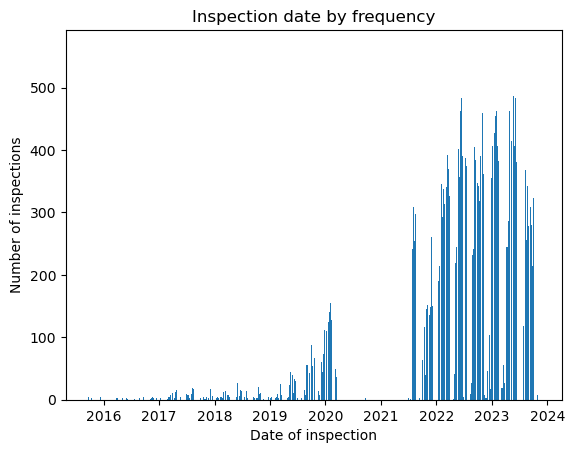

In [122]:
plt.bar(dates['inspection_date'], dates['count'])
plt.xlabel("Date of inspection")
plt.ylabel("Number of inspections")
plt.title('Inspection date by frequency')

plt.show()

### Check column values one more time: 

In [123]:
for col in df.columns:
    print(f'Column name: {col}')
    print(df[col].value_counts(dropna=False))
    print("-"*50)
    print("\n")

Column name: score
score
12.0     17042
13.0     15286
0.0       9097
10.0      8568
11.0      7877
         ...  
168.0        9
112.0        8
110.0        8
142.0        8
140.0        5
Name: count, Length: 130, dtype: int64
--------------------------------------------------


Column name: camis
camis
40398688    60
41406895    59
50045647    53
40365904    51
50111296    49
            ..
50111999     1
50086546     1
40883586     1
50071496     1
50137122     1
Name: count, Length: 25379, dtype: int64
--------------------------------------------------


Column name: inspection_date
inspection_date
2023-04-13    564
2023-03-16    552
2023-02-16    535
2023-02-15    533
2022-05-12    524
             ... 
2018-02-01      1
2017-05-07      1
2019-01-09      1
2018-12-26      1
2016-04-27      1
Name: count, Length: 1578, dtype: int64
--------------------------------------------------


Column name: inspection_type
inspection_type
Cycle Inspection / Initial Inspection                

# `EXPORT CSV to use in model training` ./training.ipynb

In [124]:
df.to_csv("cleaned_inspection_data.csv",index=False)